In [1]:
import pandas as pd
import seaborn as sns

In [110]:
pip install flask flask-cors


Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("cardio_train.csv",sep=";")
df


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.shape

(70000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df["age"] = round(df["age"]/365)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61.0,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
df['BMI'] = df['weight']/(df['height']/100)**2

In [7]:
df["BMI_category"] = pd.cut(
    df["BMI"],
    bins=[0, 18.5, 25, 30, 100],
    labels=[0, 1, 2, 3]
)


In [8]:
df = df[(df['ap_hi'] > 50) & (df['ap_hi'] < 250)]
df = df[(df['ap_lo'] > 40) & (df['ap_lo'] < 200)]


In [9]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_category
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,1
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,3
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,2
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,1
5,8,60.0,1,151,67.0,120,80,2,2,0,0,0,0,29.384676,2
6,9,61.0,1,157,93.0,130,80,3,1,0,0,1,0,37.729725,3
7,12,62.0,2,178,95.0,130,90,3,3,0,0,1,1,29.983588,2
8,13,48.0,1,158,71.0,110,70,1,1,0,0,1,0,28.440955,2
9,14,54.0,1,164,68.0,110,60,1,1,0,0,0,0,25.282570,2


In [10]:
df.sample(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_category
3070,4323,54.0,2,158,74.0,120,80,1,1,0,0,1,0,29.642685,2
37694,53830,40.0,1,156,65.0,110,70,1,1,0,0,1,0,26.709402,2
2080,2945,55.0,2,164,82.0,130,80,3,1,0,0,1,1,30.487805,3
31609,45129,49.0,1,165,68.0,110,80,1,1,0,0,1,0,24.977043,1
8494,12120,46.0,1,170,72.0,110,60,1,1,0,0,1,1,24.913495,1
27539,39371,44.0,1,176,93.0,160,90,1,1,0,0,1,1,30.023244,3
59182,84503,50.0,2,170,60.0,120,80,1,1,0,0,1,1,20.761246,1
39808,56891,48.0,1,155,93.0,150,90,1,1,0,0,1,1,38.709677,3
12184,17397,63.0,2,179,121.0,140,100,3,3,1,0,0,1,37.764115,3
12012,17144,64.0,1,157,69.0,150,100,2,1,0,0,1,1,27.993022,2


In [11]:
df.isnull().sum()

id               0
age              0
gender           0
height           0
weight           0
ap_hi            0
ap_lo            0
cholesterol      0
gluc             0
smoke            0
alco             0
active           0
cardio           0
BMI              0
BMI_category    27
dtype: int64

In [12]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,68759.000000,68759.000000,68759.000000,68759.000000,68759.000000,68759.000000,68759.000000,68759.000000,68759.000000,68759.000000,68759.000000,68759.000000,68759.000000,68759.000000
mean,49974.766547,53.326779,1.348754,164.362643,74.123104,126.616821,81.391672,1.364723,1.225978,0.088018,0.053651,0.803386,0.494888,27.522768
std,28845.845329,6.767540,0.476580,8.184658,14.330213,16.757964,9.657400,0.678992,0.571952,0.283323,0.225330,0.397441,0.499978,6.050202
min,0.000000,30.000000,1.000000,55.000000,11.000000,70.000000,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,24999.000000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50016.000000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494
75%,74869.500000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.119376
max,99999.000000,65.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [13]:
df.duplicated().sum()

0

In [14]:
df = df.drop_duplicates()


In [15]:
corr_mat = df.corr()
corr_mat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_category
id,1.000000,0.003128,0.002959,-0.003002,-0.002364,0.001207,-0.001165,0.006001,0.002294,-0.003374,0.000659,0.003795,0.003831,-0.001885,0.000046
age,0.003128,1.000000,-0.023422,-0.081480,0.054383,0.208468,0.153026,0.155347,0.099005,-0.048019,-0.029208,-0.010394,0.239102,0.086528,0.103355
gender,0.002959,-0.023422,1.000000,0.499372,0.155972,0.061292,0.066510,-0.036588,-0.021126,0.338788,0.171112,0.005821,0.007238,-0.096603,-0.083495
height,-0.003002,-0.081480,0.499372,1.000000,0.291768,0.018246,0.034871,-0.050599,-0.018814,0.188345,0.094784,-0.007375,-0.010847,-0.287895,-0.171732
weight,-0.002364,0.054383,0.155972,0.291768,1.000000,0.269047,0.249543,0.140948,0.106826,0.067034,0.068030,-0.017765,0.179653,0.763905,0.760852
ap_hi,0.001207,0.208468,0.061292,0.018246,0.269047,1.000000,0.699270,0.193995,0.092733,0.027195,0.032482,-0.001426,0.424953,0.231644,0.250173
ap_lo,-0.001165,0.153026,0.066510,0.034871,0.249543,0.699270,1.000000,0.159062,0.076690,0.024656,0.043390,0.000144,0.335959,0.206934,0.225002
cholesterol,0.006001,0.155347,-0.036588,-0.050599,0.140948,0.193995,0.159062,1.000000,0.451308,0.009881,0.035698,0.009091,0.221498,0.146295,0.165191
gluc,0.002294,0.099005,-0.021126,-0.018814,0.106826,0.092733,0.076690,0.451308,1.000000,-0.005710,0.011214,-0.007358,0.090144,0.101780,0.110736
smoke,-0.003374,-0.048019,0.338788,0.188345,0.067034,0.027195,0.024656,0.009881,-0.005710,1.000000,0.339965,0.025433,-0.016228,-0.027917,-0.017677


In [16]:
corr_with_cardio = df.corr()['cardio']
corr_with_cardio

id              0.003831
age             0.239102
gender          0.007238
height         -0.010847
weight          0.179653
ap_hi           0.424953
ap_lo           0.335959
cholesterol     0.221498
gluc            0.090144
smoke          -0.016228
alco           -0.008216
active         -0.037299
cardio          1.000000
BMI             0.164362
BMI_category    0.183227
Name: cardio, dtype: float64

gender
1    44779
2    23980
Name: count, dtype: int64


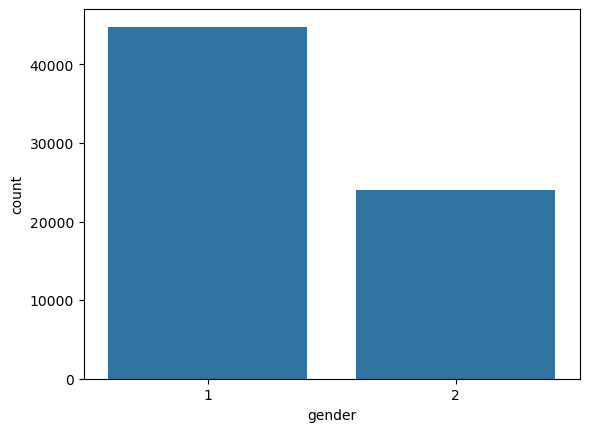

In [17]:
sns.countplot(x=df["gender"])
print(df["gender"].value_counts())

<Axes: xlabel='age', ylabel='Count'>

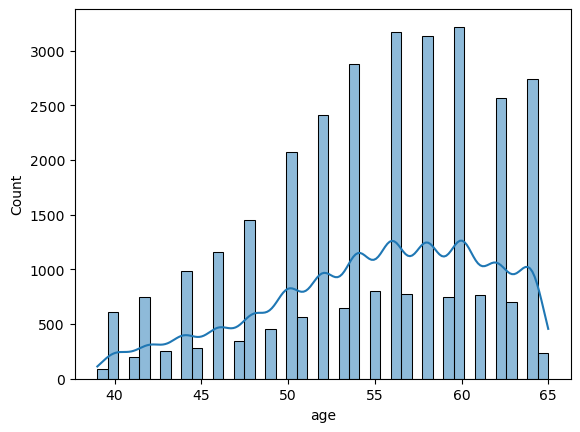

In [18]:
sns.histplot(df[df['cardio']==1]['age'],kde=True)

<Axes: xlabel='age', ylabel='Density'>

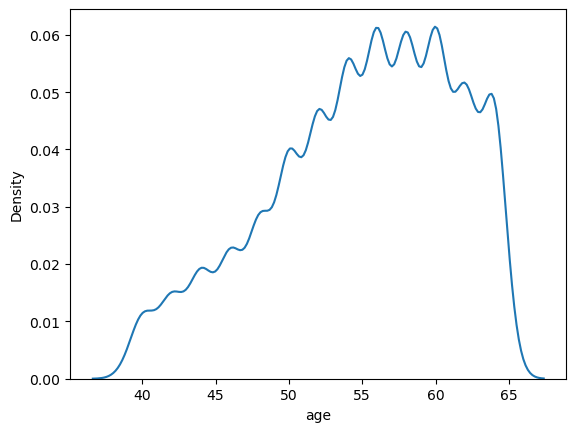

In [19]:
#density curve
sns.kdeplot(df[df['cardio']==1]['age'])

<Axes: xlabel='gender', ylabel='age'>

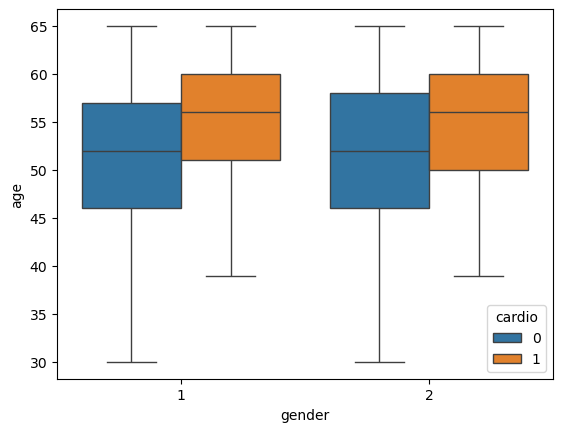

In [20]:
sns.boxplot(data=df, x='gender', y="age", hue="cardio")

In [21]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) |
          (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [22]:
# Gender already binary
df['gender'] = df['gender'].map({1: 0, 2: 1})

# One-hot encoding (if required)
# df = pd.get_dummies(df, columns=['cholesterol', 'gluc'], drop_first=True)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI']
df[num_cols] = scaler.fit_transform(df[num_cols])


<Axes: xlabel='cardio', ylabel='count'>

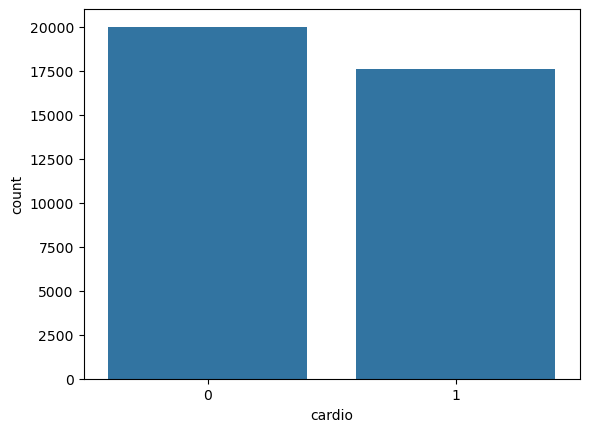

In [24]:
sns.countplot(x='cardio', data=df)


<Axes: xlabel='gender', ylabel='count'>

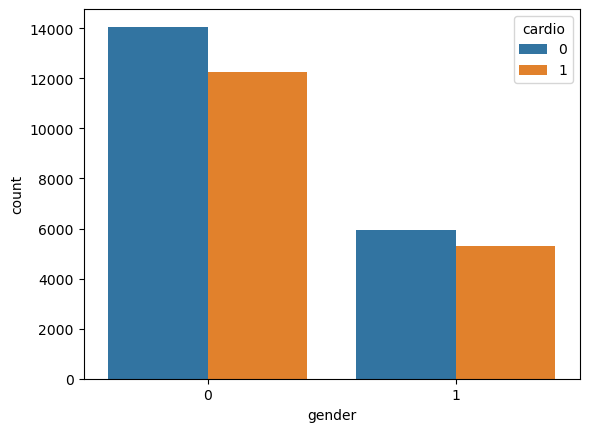

In [25]:
sns.countplot(x='gender', hue='cardio', data=df)


<Axes: xlabel='age', ylabel='Count'>

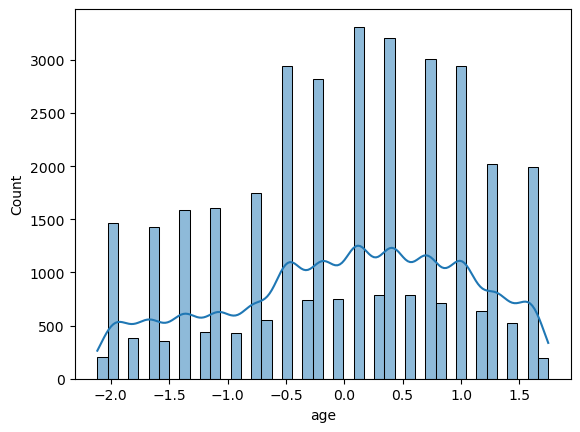

In [26]:
sns.histplot(df['age'], kde=True)


<Axes: xlabel='cardio', ylabel='BMI'>

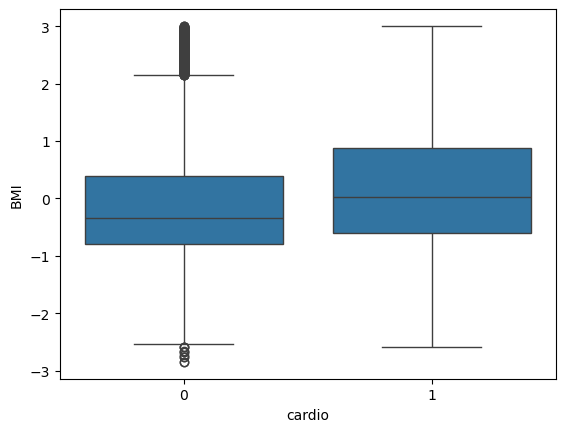

In [27]:
sns.boxplot(x='cardio', y='BMI', data=df)


<Axes: xlabel='ap_hi', ylabel='ap_lo'>

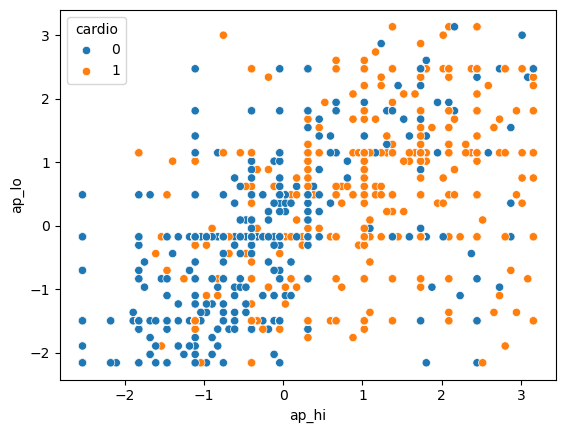

In [28]:
sns.scatterplot(x='ap_hi', y='ap_lo', hue='cardio', data=df)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [30]:
X = df.drop('cardio', axis=1)   
y = df['cardio']               


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [32]:
model = LogisticRegression(max_iter=1000)


In [33]:
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [34]:
y_pred = model.predict(X_test)


In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.732934131736527


In [36]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[3303  689]
 [1318 2205]]


In [37]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.83      0.77      3992
           1       0.76      0.63      0.69      3523

    accuracy                           0.73      7515
   macro avg       0.74      0.73      0.73      7515
weighted avg       0.74      0.73      0.73      7515



In [38]:
y_pred = model.predict(X_test)


In [39]:
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.732934131736527


In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[3303  689]
 [1318 2205]]


In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.83      0.77      3992
           1       0.76      0.63      0.69      3523

    accuracy                           0.73      7515
   macro avg       0.74      0.73      0.73      7515
weighted avg       0.74      0.73      0.73      7515



In [43]:
from sklearn.model_selection import KFold

In [44]:
k=KFold(n_splits=10)

In [45]:
model1=LogisticRegression(max_iter=1000)
    


for train_index, test_index in k.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    model1 = LogisticRegression(max_iter=1000)
    model1.fit(X_train, y_train)

    print(model1.score(X_test, y_test))

    

C:\Users\MONIL KANSAGRA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.731506120276743


C:\Users\MONIL KANSAGRA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7386907929749867


C:\Users\MONIL KANSAGRA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.738158594997339
0.7391535799840299


C:\Users\MONIL KANSAGRA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7237157306361459


C:\Users\MONIL KANSAGRA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7301038062283737
0.7293052967793452
0.7287729571466596
0.7181261644929465
0.7309023156774022


C:\Users\MONIL KANSAGRA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


model1 = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [47]:
model1

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7125
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      2032
           1       0.71      0.62      0.67      1725

    accuracy                           0.71      3757
   macro avg       0.71      0.71      0.71      3757
weighted avg       0.71      0.71      0.71      3757



In [49]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred_dt = dt_model.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")

Decision Tree Accuracy: 0.5672


In [50]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")

SVM Accuracy: 0.5409


In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")

KNN Accuracy: 0.4591


In [52]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Train and predict with Logistic Regression (as you provided)
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# 2. Updated comparison dictionary including Logistic Regression
comparison_data = {
    "Model": ["Random Forest", "Decision Tree", "SVM", "KNN", "Logistic Regression"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn),
        acc_lr  
    ]
}

# 3. Create DataFrame and sort by Accuracy
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.sort_values(by="Accuracy", ascending=False))

                 Model  Accuracy
4  Logistic Regression  0.730902
0        Random Forest  0.712537
1        Decision Tree  0.567208
2                  SVM  0.540857
3                  KNN  0.459143


C:\Users\MONIL KANSAGRA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
import pickle

# Save your trained logistic regression model
# Assuming 'model_lr' is the name of your trained model in the notebook
pickle.dump(model_lr, open('model.pkl', 'wb'))